# India GDP Rate 1960-2022

# About Dataset

# Context:
GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.
Determining gross domestic product (GDP)

GDP can be determined in three ways, all of which should, theoretically, give the same result.
They are the production (or output or value added) approach, the income approach, and the
speculated expenditure approach. It is representative of the total output and income
within an economy.

# Columns In The Dataset
- YEAR
- GDP
- Per Capita Income
- Growth Rate

# Acknowledgements (From The Author Of The Data)
The Method for collecting the Data is Web Scraping

# Link
https://www.kaggle.com/datasets/rajkumarpandey02/india-gdp-rate-19602022

# 1. Importing The Relevant Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# 2. Importing The Data

In [2]:
df = pd.read_csv("/kaggle/input/india-gdp-rate-19602022/India GDP 1960-2022.csv")
df.head()

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP,Per Capita,Growth
1,0.0,2021,"$3,173.40B","$2,277",8.95%
2,1.0,2020,"$2,667.69B","$1,933",-6.60%
3,2.0,2019,"$2,831.55B","$2,072",3.74%
4,3.0,2018,"$2,702.93B","$1,998",6.45%


# 3. Structuring & Cleaning The Data 

In [3]:
# Checking For Null Values 
df.isnull().sum()

Unnamed: 0                       1
India GDP - Historical Data      0
India GDP - Historical Data.1    0
India GDP - Historical Data.2    0
India GDP - Historical Data.3    0
dtype: int64

In [4]:
# Droping the first column - The values are similar to the index values (But in Float)
df.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
df

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%
...,...,...,...,...
58,1964,$56.48B,$116,7.45%
59,1963,$48.42B,$101,5.99%
60,1962,$42.16B,$90,2.93%
61,1961,$39.23B,$85,3.72%


In [5]:
# Renaming The Columns
df.rename(columns={
        'India GDP - Historical Data' : 'Year', 
        'India GDP - Historical Data.1' : 'GDP ($,B)', 
        'India GDP - Historical Data.2' : 'Per Capita ($)', 
        'India GDP - Historical Data.3': 'Growth (%)'   
                  }, inplace=True)
df

,Year,"GDP ($,B)",Per Capita ($),Growth (%)
0,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%
...,...,...,...,...
58,1964,$56.48B,$116,7.45%
59,1963,$48.42B,$101,5.99%
60,1962,$42.16B,$90,2.93%
61,1961,$39.23B,$85,3.72%


In [6]:
# Removing the first row 
df = df[1:] 
df

,Year,"GDP ($,B)",Per Capita ($),Growth (%)
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%
5,2017,"$2,651.47B","$1,981",6.80%
...,...,...,...,...
58,1964,$56.48B,$116,7.45%
59,1963,$48.42B,$101,5.99%
60,1962,$42.16B,$90,2.93%
61,1961,$39.23B,$85,3.72%


In [7]:
# GDP ($,B)
# Aim: Convert $37.03B -> 3703 -> 37.03
# String -> Integer -> Float 
df['GDP ($,B)'] = df['GDP ($,B)'].replace('[\$\,\.\"B"]', '', regex=True).astype(int)
df['GDP ($,B)'] = df['GDP ($,B)']/100
df

# Per Capita ($)
# Aim: Convert $82 -> 82
# String -> Float 
df['Per Capita ($)'] = df['Per Capita ($)'].replace('[\$\,\.]', '', regex=True).astype(float)

In [8]:
# There is one value that is fully string i.e) "%"
# Conversion to "0%" is needed for further processsing 
df['Growth (%)'] = df['Growth (%)'].replace(["%"], ["0%"])

# Growth (%)
# Aim:Convert 3.72% -> 372 -> 3.72
# String -> int -> float 
df['Growth (%)'] = df['Growth (%)'].replace('[\"%"\.\""]', '', regex=True).astype(int)
df['Growth (%)'] = df['Growth (%)']/100

In [9]:
# I am reversing the datafram so that things are easier during visualization
df = df.reindex(index=df.index[::-1])
df

,Year,"GDP ($,B)",Per Capita ($),Growth (%)
62,1960,37.03,82.0,0.00
61,1961,39.23,85.0,3.72
60,1962,42.16,90.0,2.93
59,1963,48.42,101.0,5.99
58,1964,56.48,116.0,7.45
...,...,...,...,...
5,2017,2651.47,1981.0,6.80
4,2018,2702.93,1998.0,6.45
3,2019,2831.55,2072.0,3.74
2,2020,2667.69,1933.0,-6.60


In [10]:
# Final checking of all the types 
df.dtypes

Year               object
GDP ($,B)         float64
Per Capita ($)    float64
Growth (%)        float64
dtype: object

# 4. Visualize The Data

# (i) Year vs Growth

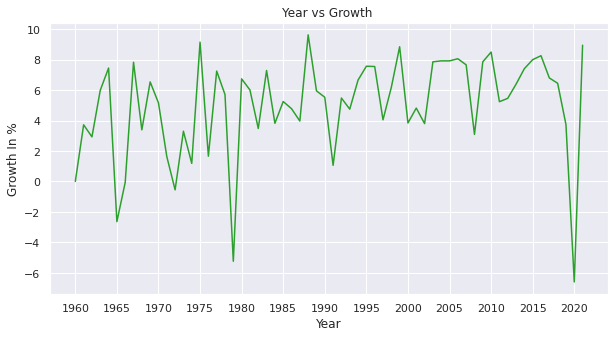

In [11]:
fig, (ax) = plt.subplots(figsize=(10,5))

# Year vs Growth
ax.plot(df['Year'], df['Growth (%)'], 'tab:green')
ax.set( title = "Year vs Growth ", 
        xlabel = "Year", 
        ylabel = "Growth In %", 
      )
myLocator1 = mticker.MultipleLocator(5)
ax.xaxis.set_major_locator(myLocator1)

plt.show()

# Inference (Year vs Growth)
The graph has a lot of ups and downs. Possible reasons for significant recessions are 
- 1965: Indo Pakistan War
- 1979: The Emergency
- 2020: The Pandemic

But even after such -ve growth percentage, the country has seeming pulled itself up within few short years. 

# (ii) GDP vs Per Capita Income 

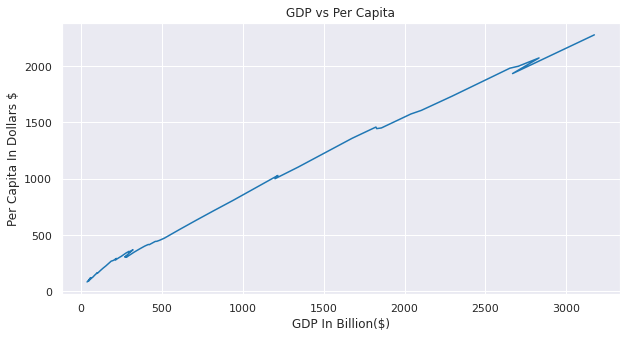

In [12]:
fig, (ax0) = plt.subplots(figsize=(10,5))

# GDP vs Per Capita
ax0.plot(df['GDP ($,B)'], df['Per Capita ($)'], 'tab:blue')
ax0.set( title = "GDP vs Per Capita", 
        xlabel = "GDP In Billion($)", 
        ylabel = "Per Capita In Dollars $", 
       )

plt.show()

# Inference (GDP vs Per Capita Income)
Investopedia states that the ```Per Capita Income``` is a measure of the amount of money earned per person in a nation or geographic region. 

Wikepedia tell that the ```Gross domestic product (GDP)``` is a monetary measure of the market value of all the final goods and services produced and sold (not resold) in a specific time period by countries.

Thus the ```Per Capita Income``` vs ```GDP``` has a linear trend. 

The linear trend can be explained by the concept found in Pediaa which states that GDP is calculated by dividing the GDP of a country by its population.

# (iii) Year vs GDP & Year vs Per Capita Income 

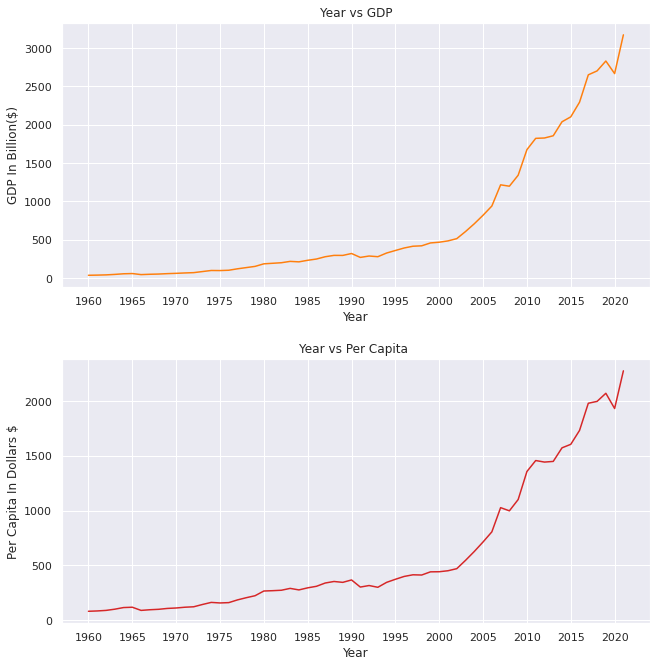

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=False)
fig.tight_layout(pad=4.0) # Padding 

# Year vs GDP
ax1.plot(df['Year'], df['GDP ($,B)'], 'tab:orange')
ax1.set( title = "Year vs GDP", 
        xlabel = "Year", 
        ylabel = "GDP In Billion($)", 
      )
myLocator = mticker.MultipleLocator(5)
ax1.xaxis.set_major_locator(myLocator)

# Year vs Per Capita
ax2.plot(df['Year'], df['Per Capita ($)'], 'tab:red')
ax2.set( title = "Year vs Per Capita ", 
        xlabel = "Year", 
        ylabel = "Per Capita In Dollars $", 
      )
myLocator0 = mticker.MultipleLocator(5)
ax2.xaxis.set_major_locator(myLocator0)

plt.show()


# Inference (Year vs GDP)
The Year vs GDP and the Year vs Per Capita Income show the same trend. This is explainable by the earlier inference. 

Although the country had -ve growth percentage in ```1965```, ```1979``` and ```2020``` years, the GDP has constantly risen with no massive dips except the year ```2020```. Nevertheless, the rising momentum is regained in 2021. 

# (iv) GDP vs Growth & Per Capita Income vs Growth

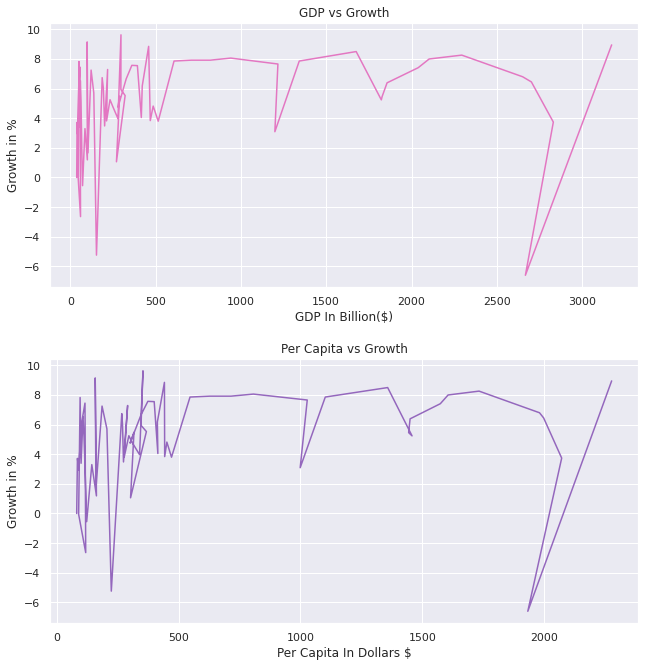

In [14]:
fig, (ax3, ax4) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=False)
fig.tight_layout(pad=4.0) # Padding 

# GDP vs Growth 
ax3.plot(df['GDP ($,B)'], df['Growth (%)'], 'tab:pink')
ax3.set( title = "GDP vs Growth", 
        xlabel = "GDP In Billion($)", 
        ylabel = "Growth in %", 
      )

# Per Capita vs Growth
ax4.plot(df['Per Capita ($)'], df['Growth (%)'],'tab:purple' )
ax4.set( title = "Per Capita vs Growth", 
        xlabel = "Per Capita In Dollars $",
        ylabel = "Growth in %", 
      )

plt.show()

# Inference (GDP vs Growth)
Again the GDP vs Growth and the Per Capita Income vs Growth show the same trend. This is explainable by the earlier inference. 

First look at the graph tells that there is no linear or defined trend to this. Though the deepest spike around the ```2000``` in the ```Per Capita Income``` could be explained by the Pandemic. 

According to Marketcalls, the GDP growth rate increases if retail expenditures, government spending, and exports increase. The growth rate will decline with increases in exports, inventory, and declines in consumer, business or government spending. 

These are the same factors influences the ups and downs of the GDP.

Despite of the ups and downs in the +ve half of the ```Growth in %```, the ```Per Capita Income``` seemes to be increasing constantly. (The values are arranged by the years in the dataframe). 

So, I think that there might be other factors that cause the ```Per Capita Income``` to move forward depsite changes in the ```Growth in %```.

In [15]:
#I had to locally save the new dataframe with changes
#df.to_csv("data-new.csv", index = False)

# Upvote This Notebook ✨